## Naive Bayes Classifier, Confusion Matrix, and Performance Metrics 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('iris')
df.head()

/home/baydin2/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.model_selection import train_test_split

# We will get setosa and virginica labels only for a change. (Not necessary, just for example)
df=df[df['species'].isin(['setosa', 'virginica'])]
print(df)

X, y = df.iloc[:,:4].values, df['species'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[100 rows x 5 columns]


### Create a NB Classifier

In [3]:
from sklearn.naive_bayes import GaussianNB
#GaussianNB implements the Gaussian Naive Bayes algorithm for classification. 
#The likelihood of the features is assumed to be Gaussian.

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
#After being fitted, the model can then be used to predict the class of samples
y_pred = gnb.predict(X_test)
gnb.score(X_test, y_test)

1.0

#### Create a confusion matrix and visualize it

In [4]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("\n", confmat)


 [[15  0]
 [ 0 18]]


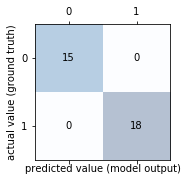

In [5]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted value (model output)')
plt.ylabel('actual value (ground truth)')
plt.show()
# 0 is setosa and 1 is virginica

#### Get precision, recall and f1-score for setosa class

In [6]:

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label='setosa'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label='setosa'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label='setosa'))

Precision: 1.000
Recall: 1.000
F1: 1.000


### K-fold Cross-validation

In [7]:
from sklearn.model_selection import KFold # import KFold

X, y = df.iloc[:,:4].values, df['species'].values 

kf = KFold(n_splits=4, shuffle=True) # Define the split - into 4 folds 
print( kf.get_n_splits(X) ) # returns the number of splitting iterations in the cross-validator
print(kf) 


for i, ind in enumerate(kf.split(X)):
    train_index, test_index = ind[0], ind[1]
    
    print('\nFold: ', i, '\nTRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    gnb = GaussianNB()
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    print('Score from fold ', i, ': ', gnb.score(X_test, y_test))


4
KFold(n_splits=4, random_state=None, shuffle=True)

Fold:  0 
TRAIN: [ 1  2  3  5  7  8 10 12 13 14 15 16 19 20 21 23 24 25 26 27 28 29 30 31
 32 34 35 37 38 40 41 42 43 44 45 46 47 48 49 50 53 54 55 57 58 59 60 61
 63 65 66 67 68 69 72 73 74 75 76 78 79 80 81 84 85 86 87 88 90 91 92 95
 97 98 99] 
TEST: [ 0  4  6  9 11 17 18 22 33 36 39 51 52 56 62 64 70 71 77 82 83 89 93 94
 96]
Score from fold  0 :  1.0

Fold:  1 
TRAIN: [ 0  2  3  4  5  6  9 11 15 17 18 19 20 21 22 23 24 25 28 29 30 33 34 35
 36 37 38 39 43 45 46 47 48 49 51 52 53 54 55 56 57 58 60 61 62 63 64 65
 66 68 69 70 71 72 74 76 77 79 80 81 82 83 84 85 87 88 89 91 92 93 94 95
 96 97 98] 
TEST: [ 1  7  8 10 12 13 14 16 26 27 31 32 40 41 42 44 50 59 67 73 75 78 86 90
 99]
Score from fold  1 :  1.0

Fold:  2 
TRAIN: [ 0  1  3  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 22 24 25 26 27 30
 31 32 33 35 36 37 38 39 40 41 42 44 47 50 51 52 56 57 58 59 60 61 62 63
 64 67 68 70 71 73 74 75 76 77 78 80 82 83 84 85 86 87 88 89 90 9

### Getting dummies

In [8]:
from sklearn.model_selection import train_test_split

df = sns.load_dataset('iris')

X, y = df.iloc[:,:4].values, df['species'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 


df1=pd.get_dummies(df['species'])
print(df1.shape)
print(df1.head(12))

(150, 3)
    setosa  versicolor  virginica
0        1           0          0
1        1           0          0
2        1           0          0
3        1           0          0
4        1           0          0
5        1           0          0
6        1           0          0
7        1           0          0
8        1           0          0
9        1           0          0
10       1           0          0
11       1           0          0


In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

skf= StratifiedKFold(n_splits=3)


fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# load classifier that we will be training
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
gnb = GaussianNB()


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=3)
classifier = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()